Load the Dataset

In [1]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')  # or your Kaggle dataset
df.head()


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


Clean the Data

In [4]:
df = pd.read_csv("owid-covid-data.csv")

# Select only relevant columns
df = df[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'New cases']]

# Drop rows with missing values in Confirmed or Deaths
df.dropna(subset=['Confirmed', 'Deaths'], inplace=True)

# Rename columns to lowercase for consistency (optional)
df.columns = df.columns.str.lower()


Create Visualizations

📌 Top 10 Countries by Total Cases

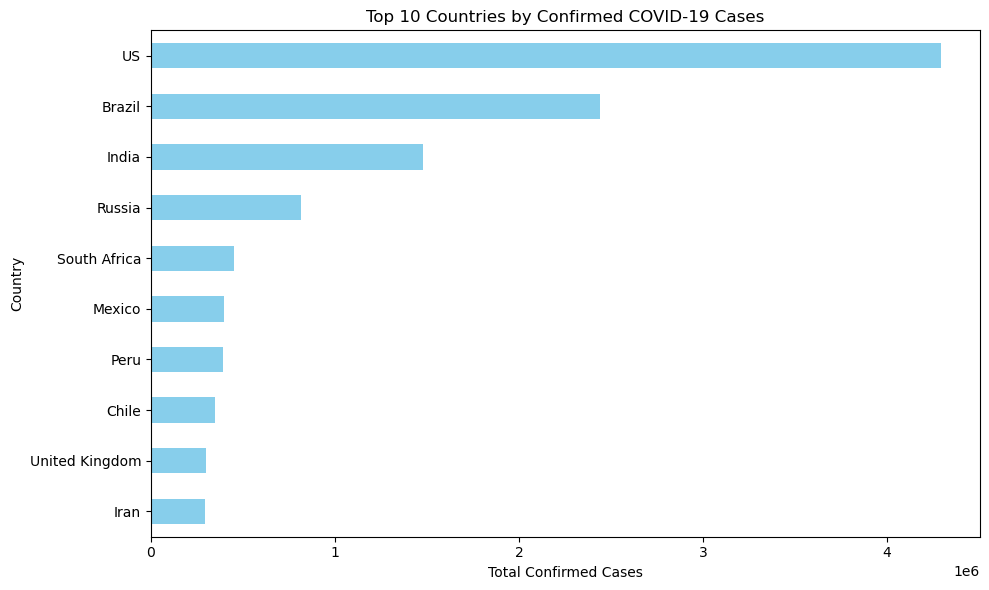

In [8]:
# Get latest date rows
latest = df[df['date'] == df['date'].max()]

# Get top 10 countries by confirmed cases
top10 = latest.groupby('country/region')['confirmed'].max().sort_values(ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

top10.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


📈 New Cases Trend Over Time for Selected Countries

['date', 'country_region', 'confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered', 'who_region']


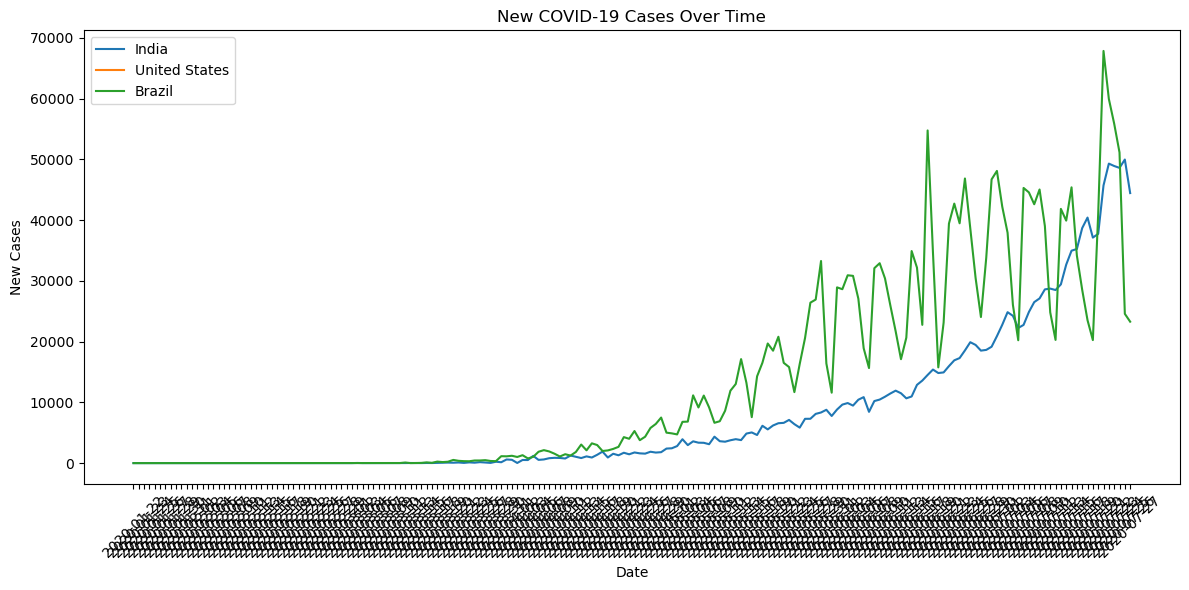

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('owid-covid-data.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

# Check column names
print(df.columns.tolist())  # Optional but useful

# Keep relevant columns
df = df[['date', 'country_region', 'confirmed', 'deaths', 'new_cases']]

# Filter for selected countries
selected = ['India', 'United States', 'Brazil']
df_selected = df[df['country_region'].isin(selected)]

# Plot
plt.figure(figsize=(12,6))
for country in selected:
    country_df = df_selected[df_selected['country_region'] == country]
    plt.plot(country_df['date'], country_df['new_cases'], label=country)

plt.title('New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


📊 Bar Chart: Total Deaths vs Total Recoveries (if recoveries available)

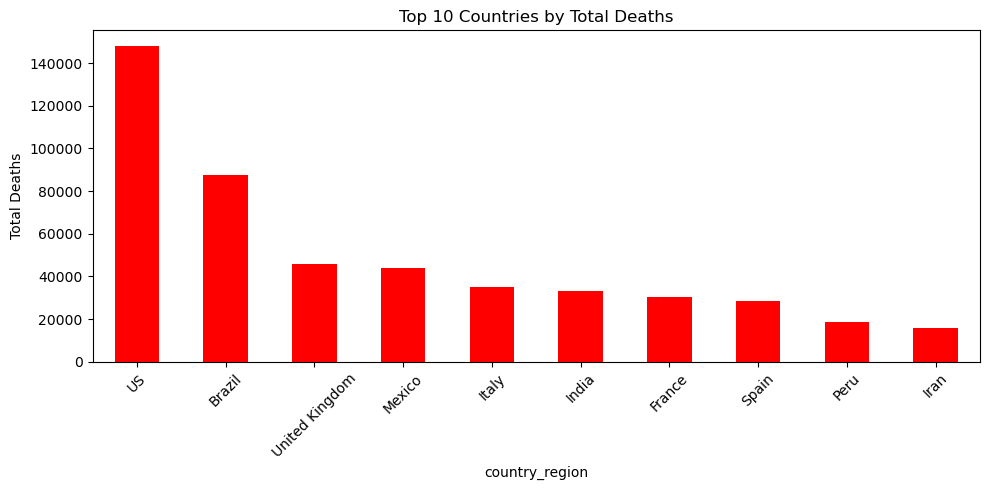

In [21]:
latest = df[df['date'] == df['date'].max()]
top_deaths = latest.groupby('country_region')['deaths'].max().sort_values(ascending=False).head(10)

top_deaths.plot(kind='bar', figsize=(10,5), color='red')
plt.title('Top 10 Countries by Total Deaths')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Group Data by Date or Country for Trends

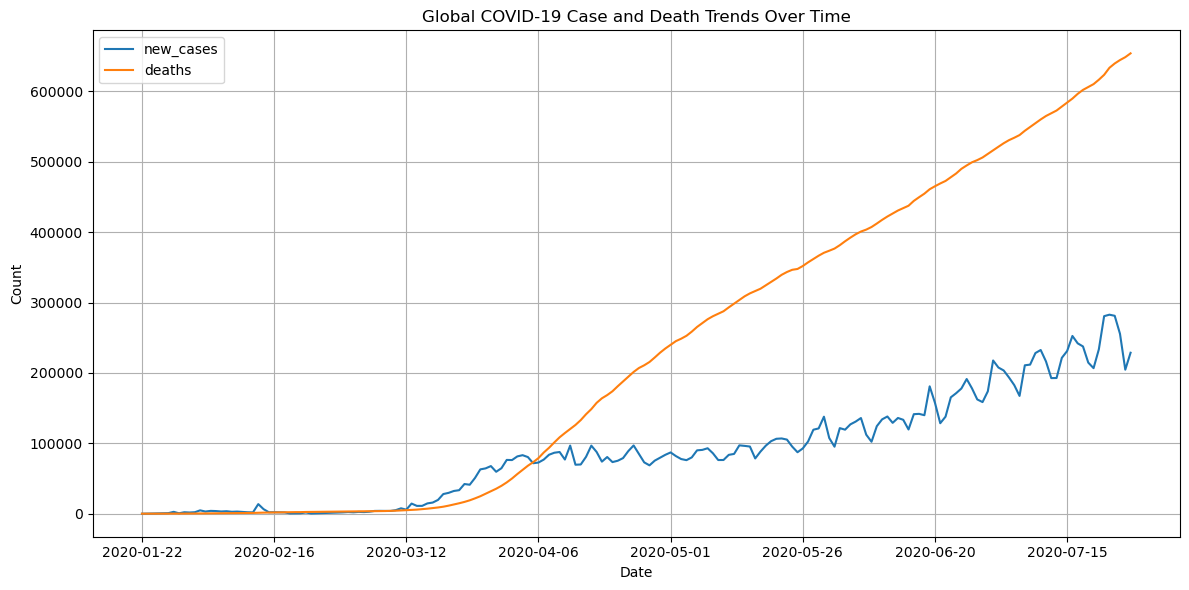

In [23]:
trend = df.groupby('date')[['new_cases', 'deaths']].sum()

trend.plot(figsize=(12,6))
plt.title('Global COVID-19 Case and Death Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


 India’s Case Growth

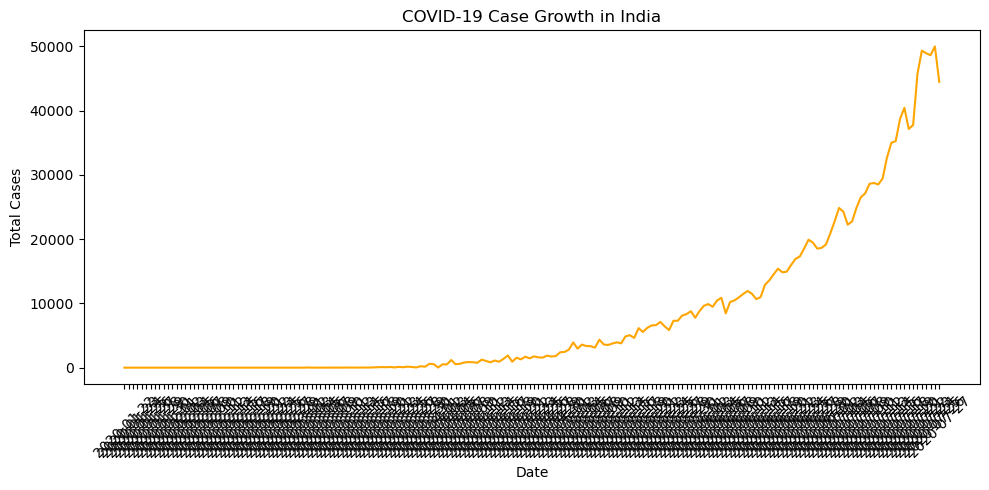

In [25]:
india = df[df['country_region'] == 'India']

plt.figure(figsize=(10,5))
plt.plot(india['date'], india['new_cases'], label='India - Total Cases', color='orange')
plt.title('COVID-19 Case Growth in India')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bonus: Calculate and Plot Death Rate

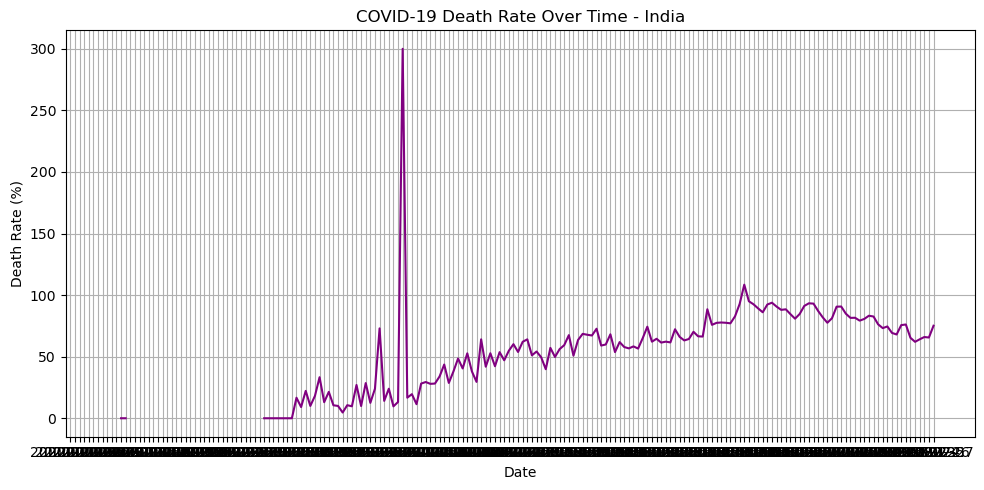

In [27]:
df['death_rate'] = (df['deaths'] / df['new_cases']) * 100

# Death rate of India over time
india = df[df['country_region'] == 'India']
plt.figure(figsize=(10,5))
plt.plot(india['date'], india['death_rate'], label='Death Rate (%) in India', color='purple')
plt.title('COVID-19 Death Rate Over Time - India')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
